# Recognizing hand-written digits with neural networks

**Neural network Python libraries**
- *Keras*: High level library based on Tensorflow (or others) that is easy to use and flexible enough for most standard users. It has a great documentation and online support. 
- *Tensorflow*: Google's neural network library. Most widely used in ML research. Flexible and powerful but also (unnecessarily?) complicated.
- *Pytorch*: The newcomer developed by Facebook. Flexible like Tensorflow but with a nicer, more Pythonic API.

In this notebook we will tackle a classification task, recognizing hand-written digits of the famous MNIST dataset.

In [1]:
%matplotlib inline
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# Set a random seedx to make train/valid split reproducible
np.random.seed(42)

## MNIST - Preparing and exploring the data

Keras has a handy function to download the entire MNIST dataset which consists of 60,000 training images and 10000 test images.

In [3]:
(x_trn, y_trn), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_trn.shape, y_trn.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**STOP!** What are training, validation and test sets?

- Training set: Data used to optimize the machine learning algorithm
- Validation set: Data used to independently verify the skill of the algorithm
- Test set: Another independent set used for *final* verification.

In [5]:
def plots(xs, ys):
    nfigs = xs.shape[0]; ncols = min(3, nfigs); nrows = int(np.floor(nfigs / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))
    for i, ax in enumerate(axs.flat):
        ax.imshow(xs[i], cmap='gray')
        ax.set_title(str(ys[i]))
        ax.set_xticks([]); ax.set_yticks([])

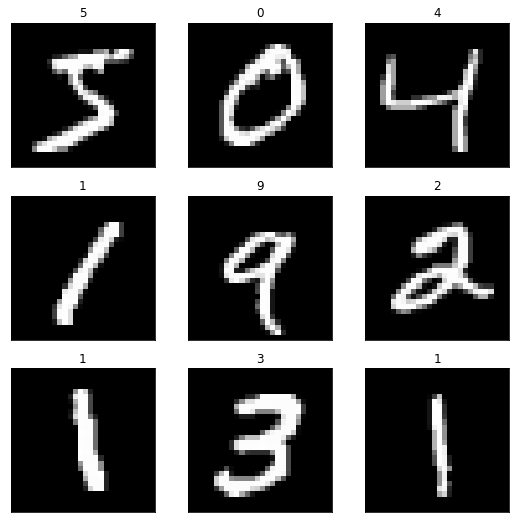

In [6]:
plots(x_trn[:9], y_trn[:9])

For gradient descent to work efficiently it is important that all the input variables or features are roughly on the same order of magnitude. Typically, we try to get them around 1.

In [7]:
def normalize(x): return x / 255

In [8]:
x_trn = normalize(x_trn)
x_test = normalize(x_test)

In [9]:
x_trn[0, 12:15, 12:15]

array([[ 0.74509804,  0.99215686,  0.2745098 ],
       [ 0.1372549 ,  0.94509804,  0.88235294],
       [ 0.        ,  0.31764706,  0.94117647]])

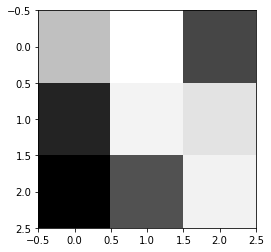

In [10]:
plt.imshow(x_trn[0, 12:15, 12:15], cmap='gray');

Now we will do something pretty dumb. We will flatten out the images and throw away all spatial information.

In [11]:
def flatten(x): return x.reshape(x.shape[0], -1)

In [12]:
x_trn_flat = flatten(x_trn)
x_test_flat = flatten(x_test)

In [13]:
x_trn_flat.shape

(60000, 784)

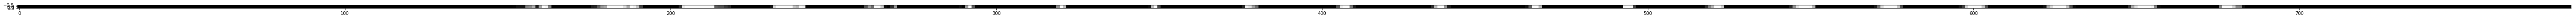

In [14]:
fig = plt.figure(figsize=(100, 1))
plt.imshow(x_trn_flat[0, None, :], cmap='gray');

We are dealing with a classification problem. That means that the correct answer to always one of 10 classes. To pass the numbers to the neural net we one-hot encode the labels.

In [17]:
yoh_trn = to_categorical(y_trn)
yoh_test = to_categorical(y_test)

In [18]:
y_trn[:3], yoh_trn[:3]

(array([5, 0, 4], dtype=uint8),
 array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]]))

## Training a simple linear network

To start, let's train a simple linear network.

In [19]:
linear_model = Sequential([
    Dense(10, input_shape=(784,), activation='softmax'),
])

After the matrix multiplication we are using a Softmax layer.

In [20]:
def softmax(x):
    np.exp(x) / np.sum(np.exp(x))

In [21]:
x = [2, 6, 3, 5]

In [22]:
np.exp(x)

array([   7.3890561 ,  403.42879349,   20.08553692,  148.4131591 ])

In [23]:
out = np.exp(x) / np.sum(np.exp(x))
out, out.sum()

(array([ 0.01275478,  0.69638749,  0.03467109,  0.25618664]), 1.0)

Next we need to judge how good our predictions is. For classification we use the categorical crossentropy:

$L = - \sum_c y_t^c \log(y_p^c)$

$c$ is the class, so one of our ten numbers.

In [24]:
linear_model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [25]:
linear_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [27]:
linear_model.fit(x_trn_flat, yoh_trn, batch_size=512, epochs=10, 
                 validation_data=(x_test_flat, yoh_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 1.1278 - acc: 0.7227 - val_loss: 0.6274 - val_acc: 0.8605
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.5459 - acc: 0.8679 - val_loss: 0.4535 - val_acc: 0.8923
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.4375 - acc: 0.8880 - val_loss: 0.3883 - val_acc: 0.9029
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.3881 - acc: 0.8980 - val_loss: 0.3552 - val_acc: 0.9075
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.3594 - acc: 0.9044 - val_loss: 0.3335 - val_acc: 0.9104
Epoch 6/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.3401 - acc: 0.9086 - val_loss: 0.3195 - val_acc: 0.9132
Epoch 7/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.3261 - acc: 0.9120 - val_loss: 0.3083 - val_acc

In [28]:
preds = linear_model.predict(x_test_flat, 4096)

In [29]:
preds[:3]

array([[  8.43881935e-05,   9.79797576e-08,   1.46157909e-04,
          3.92451650e-03,   7.98098245e-06,   6.85116538e-05,
          5.89162653e-07,   9.94257331e-01,   1.01706195e-04,
          1.40864309e-03],
       [  1.06654258e-03,   3.42985768e-05,   9.75993454e-01,
          4.61873366e-03,   1.46095835e-09,   6.57587871e-03,
          1.08728800e-02,   2.62373401e-10,   8.38065520e-04,
          9.10818230e-08],
       [  4.51236498e-04,   9.44043577e-01,   1.86070167e-02,
          7.94730149e-03,   1.02656439e-03,   2.28209863e-03,
          5.07893134e-03,   6.00582361e-03,   1.24178072e-02,
          2.13953992e-03]], dtype=float32)

In [30]:
num_preds = np.argmax(preds, axis=1); num_preds[:3]

array([7, 2, 1], dtype=int64)

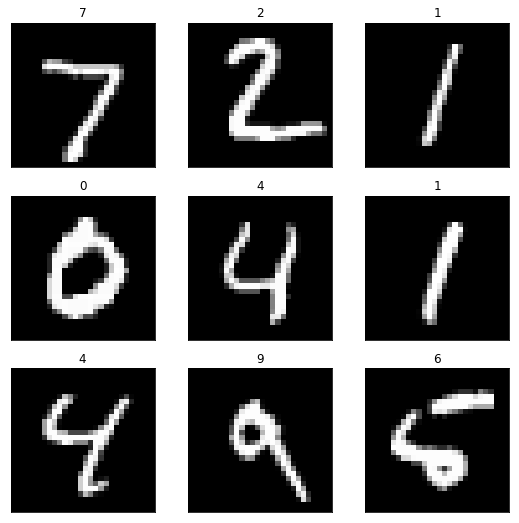

In [31]:
plots(x_test[:9].reshape(-1, 28, 28), num_preds[:9])

## A neural network

A neural network consists of several layers, connected by matrix multiplications. Layers between the input and output layer are called hidden layers. The activations in these layers are passed through a non-linear activation function.

Neural networks can approximate any non-linear function: http://neuralnetworksanddeeplearning.com/chap4.html

In [32]:
neural_net = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [33]:
neural_net.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [34]:
neural_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [35]:
neural_net.fit(x_trn_flat, yoh_trn, batch_size=512, epochs=10, 
               validation_data=(x_test_flat, yoh_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.4196 - acc: 0.8873 - val_loss: 0.2191 - val_acc: 0.9357
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.1766 - acc: 0.9499 - val_loss: 0.1425 - val_acc: 0.9580
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.1236 - acc: 0.9653 - val_loss: 0.1144 - val_acc: 0.9684
Epoch 4/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0948 - acc: 0.9736 - val_loss: 0.1040 - val_acc: 0.9694
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0751 - acc: 0.9790 - val_loss: 0.0865 - val_acc: 0.9754
Epoch 6/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0601 - acc: 0.9836 - val_loss: 0.0777 - val_acc: 0.9766
Epoch 7/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0501 - acc: 0.9864 - val_loss: 0.0730 - val_acc

### Deep neural networks

In [36]:
deep_net = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),
])

In [37]:
deep_net.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [38]:
deep_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 601,610
Trainable params: 601,610
Non-trainable params: 0
_________________________________________________________________


In [40]:
deep_net.fit(x_trn_flat, yoh_trn, batch_size=512, epochs=10, 
             validation_data=(x_test_flat, yoh_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.3472 - acc: 0.9034 - val_loss: 0.1560 - val_acc: 0.9508
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.1142 - acc: 0.9656 - val_loss: 0.0894 - val_acc: 0.9712
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0729 - acc: 0.9775 - val_loss: 0.0842 - val_acc: 0.9749
Epoch 4/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0514 - acc: 0.9840 - val_loss: 0.0817 - val_acc: 0.9755
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0354 - acc: 0.9884 - val_loss: 0.0723 - val_acc: 0.9794
Epoch 6/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0281 - acc: 0.9910 - val_loss: 0.0776 - val_acc: 0.9776
Epoch 7/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0196 - acc: 0.9942 - val_loss: 0.0734 - 

## Convolutions

To take advantage of the spatial information in images we can use convolutions rather than fully connected layers.

http://setosa.io/ev/image-kernels/

In [41]:
conv_net = Sequential([
    Conv2D(32, kernel_size=5, strides=2, activation='relu', padding='same', 
           input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=3, strides=2, activation='relu', padding='same'),
    Conv2D(128, kernel_size=3, strides=2, activation='relu', padding='same'),
    Flatten(),
    Dense(10, activation='softmax'),
])

In [42]:
conv_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                20490     
Total params: 113,674
Trainable params: 113,674
Non-trainable params: 0
_________________________________________________________________


In [43]:
conv_net.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [45]:
conv_net.fit(x_trn.reshape(-1, 28, 28, 1), yoh_trn, batch_size=512, epochs=10, 
             validation_data=(x_test.reshape(-1, 28, 28, 1), yoh_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.5795 - acc: 0.8385 - val_loss: 0.2043 - val_acc: 0.9393
Epoch 2/10
60000/60000 [==============================] - 31s 516us/step - loss: 0.1415 - acc: 0.9586 - val_loss: 0.0855 - val_acc: 0.9750
Epoch 3/10
60000/60000 [==============================] - 32s 536us/step - loss: 0.0833 - acc: 0.9754 - val_loss: 0.0592 - val_acc: 0.9796
Epoch 4/10
60000/60000 [==============================] - 31s 524us/step - loss: 0.0630 - acc: 0.9812 - val_loss: 0.0496 - val_acc: 0.9840
Epoch 5/10
60000/60000 [==============================] - 32s 531us/step - loss: 0.0516 - acc: 0.9845 - val_loss: 0.0418 - val_acc: 0.9856
Epoch 6/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.0442 - acc: 0.9866 - val_loss: 0.0410 - val_acc: 0.9868
Epoch 7/10
60000/60000 [==============================] - 32s 537us/step - loss: 0.0369 - acc: 0.9888 - val_loss: 0.

## End